We have downloaded separately the following datasets from refine.bio:
- ["GSE17612", "GSE21138", "GSE21935", "GSE53987"]
- SRP073813

Later we have combined the datasets SRP073813 and GSE53987 and downloaded them together, because SRP073813 contained too many genes.

We realize that it would be much easier to download all 5 datasets grouped together. But what has been done has been done.

In this notebook we open the datasets, join them with the necessary columns of metadata file, filter out unnecessary samples and save the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
PATH = "../data/refine.bio/"

# microarray datasets (four)

In [7]:
GSE_list = ["GSE17612", "GSE21138", "GSE21935", "GSE53987"]

tissue_columns = [None, "characteristics_ch1_brain region", "characteristics_ch1_tissue", "characteristics_ch1_tissue"]

table_with_everything = []

for i in range(len(GSE_list)):
    GSE = GSE_list[i]
    column = tissue_columns[i]

    data = pd.read_csv(PATH + GSE + ".tsv", sep="\t", index_col=0).T

    meta = pd.read_csv(PATH + f"metadata_{GSE}.tsv", sep="\t")
    
    if column is None:
        column = "BA10"
    else:
        column = meta[column].values
    
    meta = meta[["refinebio_accession_code", "title"]]
    meta = meta.set_index("refinebio_accession_code")
    meta.index.name = None
    meta.columns = ["human"]
    meta["region"] = column
    meta = meta[(~meta.human.str.contains("bipolar")) & (~meta.human.str.contains("MDD"))]
    print(f'{meta.human.str.lower().str.contains("sc").sum()} SZ vs {(~meta.human.str.lower().str.contains("sc")).sum()} HC')
    print(meta.region.unique())
    
table_with_everything = pd.concat(table_with_everything)

table_with_everything.region.replace({"Pre-frontal cortex (BA46)": "BA46"}, inplace=True)

28 SZ vs 22 HC
['BA10']
28 SZ vs 29 HC
['BA46']
22 SZ vs 17 HC
['superior temporal cortex (Brodmann Area 22, BA22)']
47 SZ vs 54 HC
['hippocampus' 'Pre-frontal cortex (BA46)' 'Associative striatum']


In [12]:
display(table_with_everything.region.value_counts())

BA46                                                 89
BA10                                                 50
superior temporal cortex (Brodmann Area 22, BA22)    39
Associative striatum                                 36
hippocampus                                          33
Name: region, dtype: int64

In [13]:
table_with_everything.human.value_counts().value_counts()

1    183
2     32
Name: human, dtype: int64

In [14]:
table_with_everything.shape

(247, 20058)

In [15]:
is_control = (~table_with_everything.human.str.lower().str.contains("sc")).astype(int)
table_with_everything.insert(2, "is_control", is_control)
table_with_everything.head()

,human,region,is_control,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283307,ENSG00000283597,ENSG00000283632,ENSG00000283703,ENSG00000283709,ENSG00000283849,ENSG00000283945,ENSG00000284048,ENSG00000284309,ENSG00000284543
GSM439778,S014_Scz_M_74,BA10,0,1.448569,-0.001471,9.000389,0.575834,-0.081877,0.909567,0.485215,...,0.398692,0.102587,1.941111,0.236185,2.408422,0.334848,0.061013,-0.193307,0.213981,0.859307
GSM439779,C017_Control_M_72,BA10,1,1.547945,-0.096677,10.525544,0.947314,0.050933,1.039868,1.147053,...,0.531480,0.111803,1.635247,0.277716,1.733994,0.201200,0.144816,-0.160775,0.276903,0.756167
GSM439780,C011_Control_F_89,BA10,1,2.044714,-0.070425,10.354863,0.739052,-0.059632,0.929071,1.624510,...,0.413677,0.016422,2.193743,0.332062,1.588256,0.402333,0.077335,-0.166745,0.351504,0.755419
GSM439781,S017_Scz_F_85,BA10,0,1.402853,-0.030728,10.128362,0.807083,-0.086455,1.062902,0.839434,...,0.513321,0.138528,1.862529,0.297130,1.775727,0.340995,0.029836,-0.200705,0.436485,0.864911
GSM439782,C013_Control_M_61,BA10,1,0.983013,-0.071798,9.631223,0.502486,-0.108668,0.823590,1.221449,...,0.555014,0.151806,2.129795,0.382301,2.108699,0.430916,0.051561,-0.217781,0.162355,0.808082


In [17]:
table_with_everything.to_csv(PATH + "microarray.csv")

# RNA-seq dataset (one)

Strictly speaking, this section is not needed, because SRP073813 is part of the combined dataset that is analyzed in the Section 3.

In [18]:
rnaseq = pd.read_csv(PATH + "SRP073813.tsv", sep="\t", index_col=0).T
rnaseq.head()

Gene,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000286262,ENSG00000286263,ENSG00000286264,ENSG00000286265,ENSG00000286266,ENSG00000286268,ENSG00000286269,ENSG00000286270,ENSG00000286271,ENSG00000286272
SRR3438555,1.942959,-0.048304,2.104093,2.324989,1.378368,1.922795,2.202207,2.599714,4.910312,2.988394,...,-0.048304,0.599989,2.787198,-0.048304,0.985860,0.496252,2.780853,-0.048304,0.861214,1.428780
SRR3438556,2.279117,0.265589,2.372098,2.639704,1.287078,1.920915,2.289121,2.644892,4.175220,3.348418,...,-0.032635,0.490540,3.148295,0.505169,1.000310,0.755394,2.140385,0.440799,0.492601,1.350562
SRR3438557,2.088638,0.154746,2.472274,2.372605,1.374611,1.875059,2.105021,2.551825,4.077061,3.079701,...,0.242364,0.461319,2.899545,-0.033405,1.155445,0.713822,2.214912,0.195428,0.678480,1.420875
SRR3438558,2.098454,0.337301,2.421515,2.458040,1.319985,2.018967,2.509382,2.715232,3.696028,3.554869,...,-0.010482,0.650865,3.256069,-0.010482,0.985746,-0.010482,2.428636,-0.010482,0.604797,1.595184
SRR3438559,2.399769,0.270970,2.226805,2.204324,1.501263,2.563732,3.239068,2.665351,5.164044,3.360096,...,-0.046871,0.464062,3.686122,-0.046871,1.105357,0.680343,2.549532,0.311412,1.024190,1.547774


In [19]:
meta = pd.read_csv(PATH + "metadata_SRP073813.tsv", sep="\t")

meta = meta[["refinebio_accession_code", "refinebio_subject", "refinebio_title"]]
meta = meta.set_index("refinebio_accession_code")

In [20]:
is_relevant = (meta.refinebio_subject.str.contains("control") | (meta.refinebio_subject.str.contains("schizophrenia")))
meta = meta[is_relevant]

meta["region"] = meta["refinebio_subject"].str.split("_").str[0]

replace_dict = {
    'dlpfc': '34 Dorsolateral Prefrontal (BA9)',
    'nacc': '56 Nucleus Accumbens',
    'ancg': 'Cingulate Anterior',
}

meta["region"].replace(replace_dict, inplace=True)
meta["human"] = meta.refinebio_title.str.split("_").str[0] + "_" + meta["refinebio_subject"].str.split("_").str[1]
meta

,refinebio_subject,refinebio_title,region,human
refinebio_accession_code,,,,
SRR3438555,ancg_control,X1834_AnCg_C_SL31501,Cingulate Anterior,X1834_control
SRR3438559,nacc_schizophrenia,X2353_nAcc_S_SL31505,56 Nucleus Accumbens,X2353_schizophrenia
SRR3438560,nacc_control,X2664_nAcc_C_SL31506,56 Nucleus Accumbens,X2664_control
SRR3438561,nacc_control,X2805_nAcc_C_SL31507,56 Nucleus Accumbens,X2805_control
SRR3438562,nacc_schizophrenia,X2976_nAcc_S_SL31508,56 Nucleus Accumbens,X2976_schizophrenia
...,...,...,...,...
SRR3438897,nacc_control,X3588_nAcc_C_SL7849,56 Nucleus Accumbens,X3588_control
SRR3438902,nacc_schizophrenia,X4296_nAcc_S_SL7855,56 Nucleus Accumbens,X4296_schizophrenia
SRR3438903,nacc_schizophrenia,X4357_nAcc_S_SL7856,56 Nucleus Accumbens,X4357_schizophrenia


In [21]:
meta = meta[["human", "region"]]
meta.index.name = None

In [22]:
big_table = meta.join(rnaseq)
big_table.head()

,human,region,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000286262,ENSG00000286263,ENSG00000286264,ENSG00000286265,ENSG00000286266,ENSG00000286268,ENSG00000286269,ENSG00000286270,ENSG00000286271,ENSG00000286272
SRR3438555,X1834_control,Cingulate Anterior,1.942959,-0.048304,2.104093,2.324989,1.378368,1.922795,2.202207,2.599714,...,-0.048304,0.599989,2.787198,-0.048304,0.985860,0.496252,2.780853,-0.048304,0.861214,1.428780
SRR3438559,X2353_schizophrenia,56 Nucleus Accumbens,2.399769,0.270970,2.226805,2.204324,1.501263,2.563732,3.239068,2.665351,...,-0.046871,0.464062,3.686122,-0.046871,1.105357,0.680343,2.549532,0.311412,1.024190,1.547774
SRR3438560,X2664_control,56 Nucleus Accumbens,2.177106,-0.051191,2.198438,2.362276,1.721814,1.548758,2.025757,2.532800,...,-0.051191,0.151359,3.367909,-0.051191,1.241474,0.564202,2.302717,0.242799,0.775214,1.310010
SRR3438561,X2805_control,56 Nucleus Accumbens,2.681150,0.086147,2.105902,2.245252,1.474583,2.027043,1.865736,2.365655,...,0.155626,0.197531,3.360096,0.263979,1.192620,0.533281,2.297624,0.203276,0.639282,1.543373
SRR3438562,X2976_schizophrenia,56 Nucleus Accumbens,2.197950,0.210492,2.116410,2.264167,1.500013,1.805623,2.133254,2.215570,...,-0.047541,0.299811,3.588706,-0.047541,1.133778,0.748311,1.976020,0.202908,0.480480,1.359628


In [23]:
is_control = (~big_table.human.str.lower().str.contains("schizophrenia")).astype(int)
big_table.insert(2, "is_control", is_control)
big_table.head()

,human,region,is_control,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000286262,ENSG00000286263,ENSG00000286264,ENSG00000286265,ENSG00000286266,ENSG00000286268,ENSG00000286269,ENSG00000286270,ENSG00000286271,ENSG00000286272
SRR3438555,X1834_control,Cingulate Anterior,1,1.942959,-0.048304,2.104093,2.324989,1.378368,1.922795,2.202207,...,-0.048304,0.599989,2.787198,-0.048304,0.985860,0.496252,2.780853,-0.048304,0.861214,1.428780
SRR3438559,X2353_schizophrenia,56 Nucleus Accumbens,0,2.399769,0.270970,2.226805,2.204324,1.501263,2.563732,3.239068,...,-0.046871,0.464062,3.686122,-0.046871,1.105357,0.680343,2.549532,0.311412,1.024190,1.547774
SRR3438560,X2664_control,56 Nucleus Accumbens,1,2.177106,-0.051191,2.198438,2.362276,1.721814,1.548758,2.025757,...,-0.051191,0.151359,3.367909,-0.051191,1.241474,0.564202,2.302717,0.242799,0.775214,1.310010
SRR3438561,X2805_control,56 Nucleus Accumbens,1,2.681150,0.086147,2.105902,2.245252,1.474583,2.027043,1.865736,...,0.155626,0.197531,3.360096,0.263979,1.192620,0.533281,2.297624,0.203276,0.639282,1.543373
SRR3438562,X2976_schizophrenia,56 Nucleus Accumbens,0,2.197950,0.210492,2.116410,2.264167,1.500013,1.805623,2.133254,...,-0.047541,0.299811,3.588706,-0.047541,1.133778,0.748311,1.976020,0.202908,0.480480,1.359628


In [24]:
# big_table.to_csv(PATH + "rnaseq.csv")

In [25]:
big_table.shape[0] - big_table.is_control.sum(), big_table.is_control.sum()

(80, 83)

# Explore combined dataset SRP073813 and GSE53987

When the datasets are combined, the intersection of the genes present in them is taken. After the intersection, they are quantile normalized to the reference distribution.

In [26]:
homo_sapiens = pd.read_csv(PATH + "HOMO_SAPIENS.tsv", sep="\t", index_col=0)

In [27]:
homo_sapiens.head()

,GSM1304852,GSM1304853,GSM1304854,GSM1304855,GSM1304856,GSM1304857,GSM1304858,GSM1304859,GSM1304860,GSM1304861,...,SRR3438896,SRR3438897,SRR3438898,SRR3438899,SRR3438900,SRR3438902,SRR3438903,SRR3438904,SRR3438905,SRR3438906
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,3.364762,2.968298,2.823869,1.754899,6.160897,2.074993,2.091134,2.408963,1.729896,2.304068,...,0.697838,0.802132,0.576768,0.573693,0.720641,0.563588,1.223987,0.636138,1.143706,0.679683
ENSG00000000005,-0.145291,0.023672,-0.127923,-0.049123,-0.008338,-0.093745,-0.185499,0.017765,-0.089076,-0.099699,...,-0.090257,-0.113167,-0.102689,-0.218591,-0.089885,-0.097268,-0.132233,-0.233914,-0.217777,-0.068238
ENSG00000000419,8.607229,10.530148,10.138098,9.574999,9.770584,8.123839,10.501335,10.681101,11.132078,10.372935,...,0.725139,0.595814,0.584305,0.638173,0.574765,0.582305,0.459842,0.454939,0.571733,0.986825
ENSG00000000457,0.793695,1.074399,1.105579,1.098663,0.976018,0.761737,1.006844,1.021465,0.894351,1.020957,...,0.982855,0.765502,0.776638,0.652012,0.630457,0.616346,0.660814,0.774084,0.601448,1.215988
ENSG00000000460,-0.039023,0.014808,0.113444,0.080195,0.069756,-0.173911,-0.053428,0.025242,-0.100309,0.104791,...,0.203967,0.302727,0.225799,0.225964,0.280336,0.331988,0.264259,0.277404,0.262636,0.321101


In [28]:
homo_sapiens.shape

(19479, 537)

In [30]:
reference_distr = pd.read_csv("../data/refine.bio/reference_distr.tsv", sep="\t", header=None)
reference_distr.columns = ["reference distr"]

<AxesSubplot:ylabel='Density'>

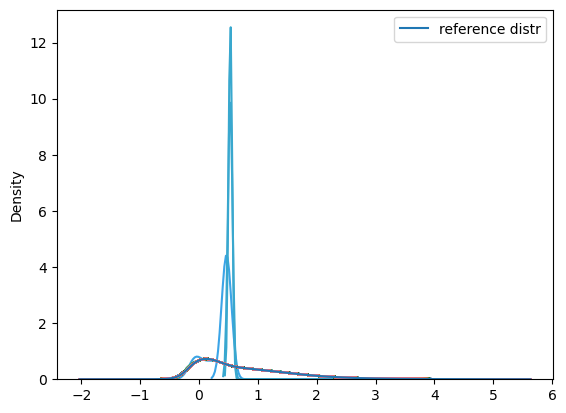

In [31]:
sns.kdeplot(data=np.log1p(homo_sapiens.values), common_norm=False, legend=False)
sns.kdeplot(np.log1p(reference_distr))

We can spot some outlier samples here. We remove them.

In [32]:
homo_sapiens = homo_sapiens.loc[:, (np.log1p(homo_sapiens)).min(axis=0) < -0.1]

<AxesSubplot:ylabel='Density'>

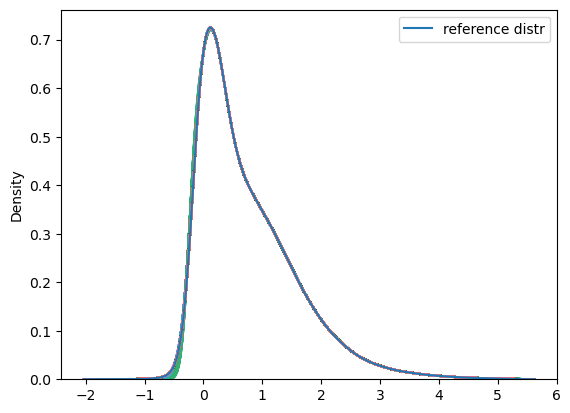

In [33]:
sns.kdeplot(data=np.log1p(homo_sapiens.values), common_norm=False, legend=False)
sns.kdeplot(np.log1p(reference_distr))

In [34]:
homo_sapiens

,GSM1304852,GSM1304853,GSM1304854,GSM1304855,GSM1304856,GSM1304857,GSM1304858,GSM1304859,GSM1304860,GSM1304861,...,SRR3438896,SRR3438897,SRR3438898,SRR3438899,SRR3438900,SRR3438902,SRR3438903,SRR3438904,SRR3438905,SRR3438906
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,3.364762,2.968298,2.823869,1.754899,6.160897,2.074993,2.091134,2.408963,1.729896,2.304068,...,0.697838,0.802132,0.576768,0.573693,0.720641,0.563588,1.223987,0.636138,1.143706,0.679683
ENSG00000000005,-0.145291,0.023672,-0.127923,-0.049123,-0.008338,-0.093745,-0.185499,0.017765,-0.089076,-0.099699,...,-0.090257,-0.113167,-0.102689,-0.218591,-0.089885,-0.097268,-0.132233,-0.233914,-0.217777,-0.068238
ENSG00000000419,8.607229,10.530148,10.138098,9.574999,9.770584,8.123839,10.501335,10.681101,11.132078,10.372935,...,0.725139,0.595814,0.584305,0.638173,0.574765,0.582305,0.459842,0.454939,0.571733,0.986825
ENSG00000000457,0.793695,1.074399,1.105579,1.098663,0.976018,0.761737,1.006844,1.021465,0.894351,1.020957,...,0.982855,0.765502,0.776638,0.652012,0.630457,0.616346,0.660814,0.774084,0.601448,1.215988
ENSG00000000460,-0.039023,0.014808,0.113444,0.080195,0.069756,-0.173911,-0.053428,0.025242,-0.100309,0.104791,...,0.203967,0.302727,0.225799,0.225964,0.280336,0.331988,0.264259,0.277404,0.262636,0.321101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000283703,0.203559,0.239188,0.042339,0.200516,0.138080,0.087786,0.160348,0.231058,0.293082,0.174163,...,0.140544,0.024736,0.145091,0.152216,0.039232,0.030803,0.085646,0.169614,0.083137,-0.026412
ENSG00000283849,0.114962,0.069040,0.150135,0.197128,0.084542,0.210981,0.181265,-0.021164,0.223581,0.154223,...,-0.079112,-0.143238,-0.127231,-0.115111,-0.148633,-0.086794,-0.145966,-0.298017,-0.099167,-0.099245
ENSG00000284048,-0.040935,-0.126110,0.029301,-0.093012,-0.138614,-0.042773,-0.138884,-0.047258,-0.067959,-0.053428,...,-0.005975,0.011746,0.093955,-0.009027,-0.082586,-0.039908,-0.006673,-0.298017,0.007265,0.036582


Note that the `meta` variable comes from the Section 2.

In [35]:
homo_sapiens = homo_sapiens[meta.index]

In [36]:
big_table = meta.join(homo_sapiens.T)

In [37]:
is_control = (~big_table.human.str.lower().str.contains("schizophrenia")).astype(int)
big_table.insert(2, "is_control", is_control)
big_table.head()

,human,region,is_control,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283117,ENSG00000283125,ENSG00000283268,ENSG00000283597,ENSG00000283632,ENSG00000283703,ENSG00000283849,ENSG00000284048,ENSG00000284309,ENSG00000284543
SRR3438555,X1834_control,Cingulate Anterior,1,0.509334,-0.196377,0.597866,0.726242,0.268203,0.499076,0.654089,...,0.116937,-0.095762,-0.064298,0.247990,0.100980,-0.037573,-0.019632,0.152838,-0.120516,0.557230
SRR3438559,X2353_schizophrenia,56 Nucleus Accumbens,0,0.768508,-0.081202,0.662515,0.648949,0.308197,0.873105,1.329346,...,0.113520,-0.129841,-0.052025,0.252519,0.343899,-0.020756,-0.045604,0.028091,-0.128438,0.572471
SRR3438560,X2664_control,56 Nucleus Accumbens,1,0.640359,-0.201660,0.653055,0.751069,0.402281,0.332299,0.553226,...,0.107493,-0.201660,-0.029774,0.356338,0.385765,0.049040,-0.113413,0.114193,-0.201660,0.760577
SRR3438561,X2805_control,56 Nucleus Accumbens,1,0.953519,-0.146645,0.598030,0.678770,0.301646,0.553664,0.470846,...,0.140862,-0.090402,-0.122697,0.347426,0.392269,0.298367,-0.026816,0.060889,-0.136572,0.868495
SRR3438562,X2976_schizophrenia,56 Nucleus Accumbens,0,0.652686,-0.100010,0.605060,0.691321,0.310358,0.439967,0.614705,...,0.118125,-0.125248,-0.064931,0.409154,0.687621,0.146486,-0.070149,0.022615,-0.057841,0.654763


In [38]:
big_table.to_csv(PATH + "rnaseq.csv")